# Data Exploration - Santander Customer Transaction Prediction

In this notebook you can find a preliminary study for the [Santander Customer Transaction Prediction Challenge on Kaggle.com](https://www.kaggle.com/c/santander-customer-transaction-prediction)
![alt text](Kaggle.png)![alt text](im-wcsanusa-logo-7-19-18.png)

###### Description
At [Santander](https://www.santanderbank.com) our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.

Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.

In [1]:
# Importing all the libraries needed
import os
from IPython.display import Image
Image("Kaggle.png") # same directory
Image("im-wcsanusa-logo-7-19-18.png") # same directory
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

# getting my path C:\\Users\\username\\Desktop
# /Users/username/Desktop for Mac
path = os.getcwd()
# / if Mac \\ if Windows
path = '\\'.join(path.split("\\")[:4])

In [2]:
# reading the training set (train.csv), I had this file in C:\\Users\\username\\Desktop\\...
# / if Mac \\ if Windows
df = pd.read_csv(path + '\\Santander_Customer_Transaction_Prediction\\data\\train.csv')

## Let's start exploring the Dataset!

In [3]:
# first records
df.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
# last records
df.tail(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [5]:
# here some info about our df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [6]:
# here a quick view of our df
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [7]:
# data types and df shape
print('Here are the data types:\n' + str(df.dtypes) + '\n')
print('This is the shape of our dataset:\n' + str(df.shape))

Here are the data types:
ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_187    float64
var_188    float64
var_189    float64
var_19

In [8]:
# Finding the null values if present:
if True in list(df.isnull().any()):
    print('There are some null values here!\nVar_Name; number_of_nulls:')
    print(df[df.columns[df.isnull().any()]].isnull().sum())
else:
    print('No null values in your Dataset!')

No null values in your Dataset!


In [9]:
# putting all the df colname in a list
dfcols = list(df.columns)

# exculdig target and index columns
variables = dfcols[2:]

# splitting the list every n elements:
n = 10
chunks = [variables[x:x + n] for x in range(0, len(variables), n)]

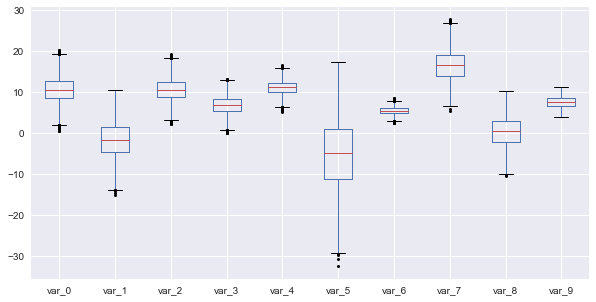

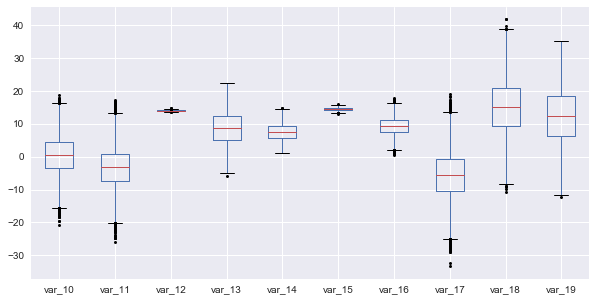

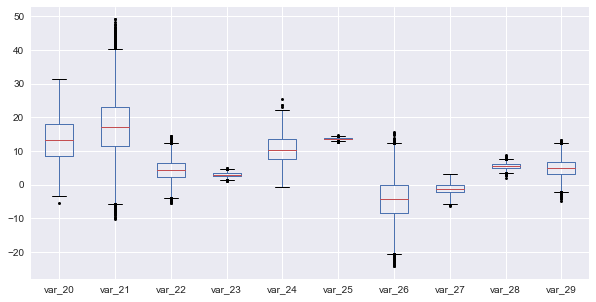

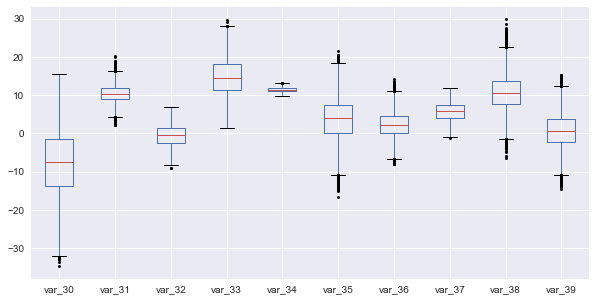

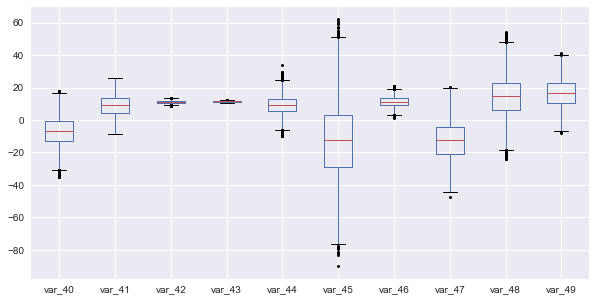

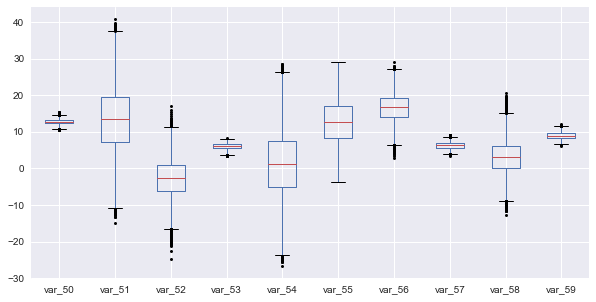

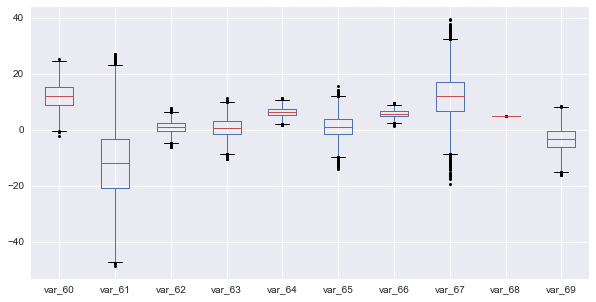

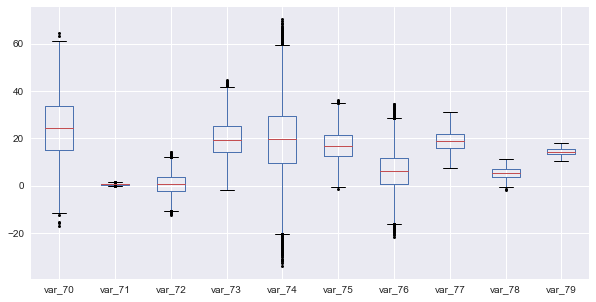

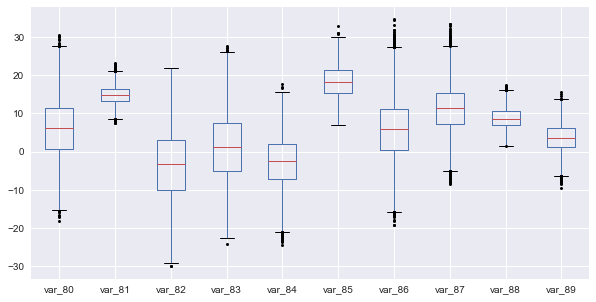

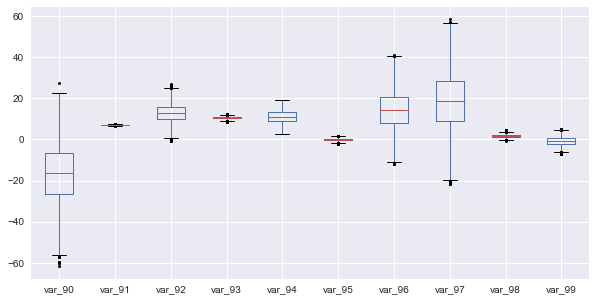

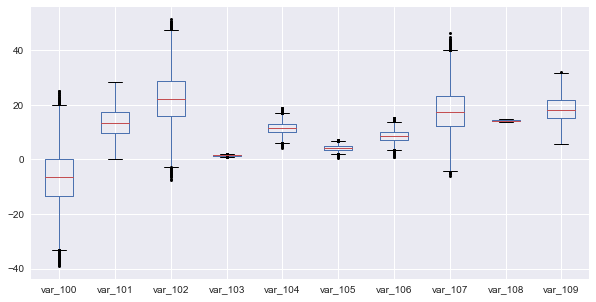

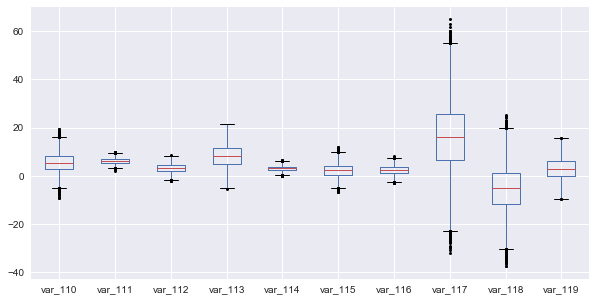

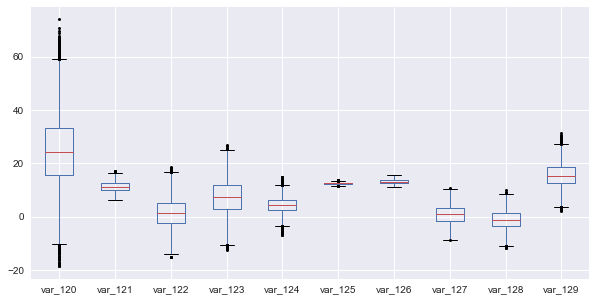

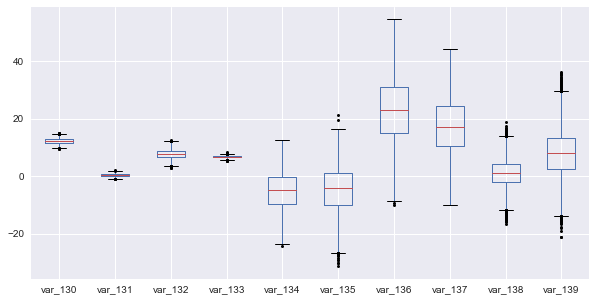

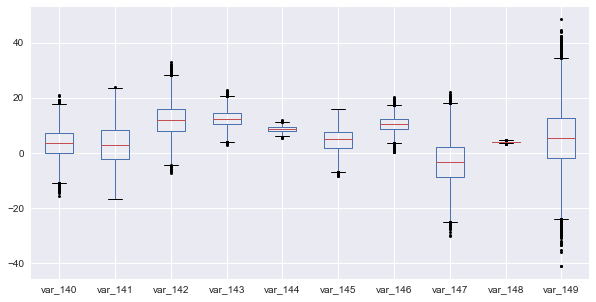

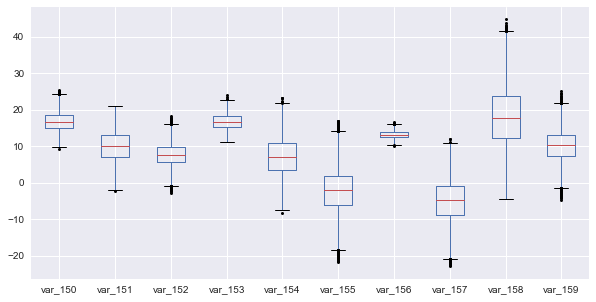

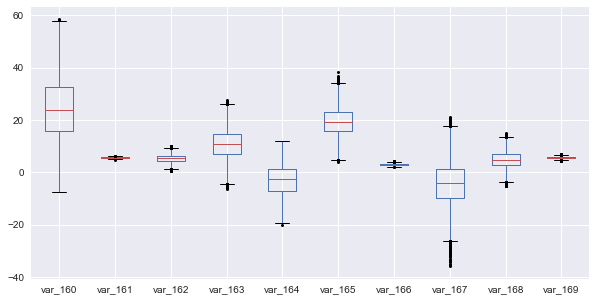

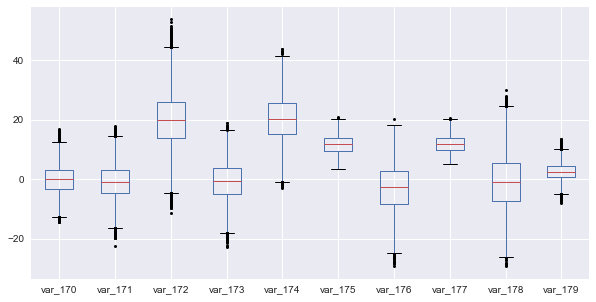

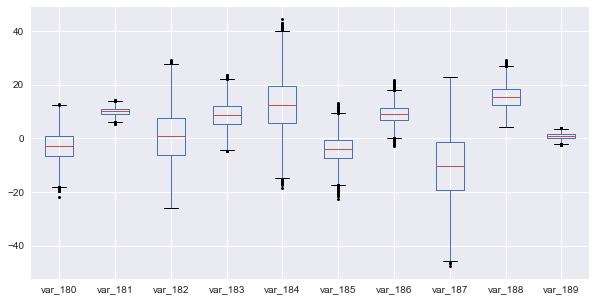

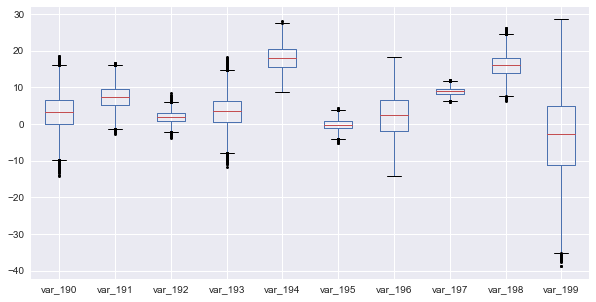

In [10]:
# displaying a boxplot every n columns:
for i in chunks:
    plt.show(df.boxplot(column = i, sym='k.', figsize=(10,5)))

## Let's look closer
###### Select an index from 0 to 199

In [14]:
# choose a column index
index = 0

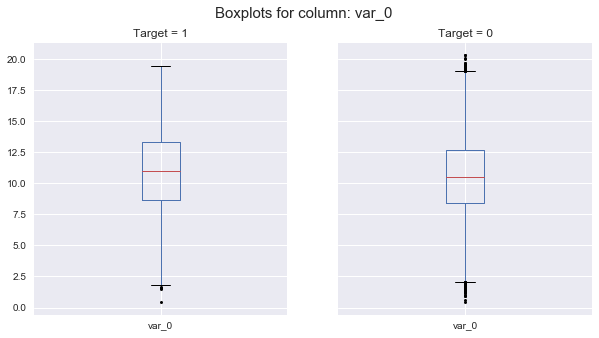

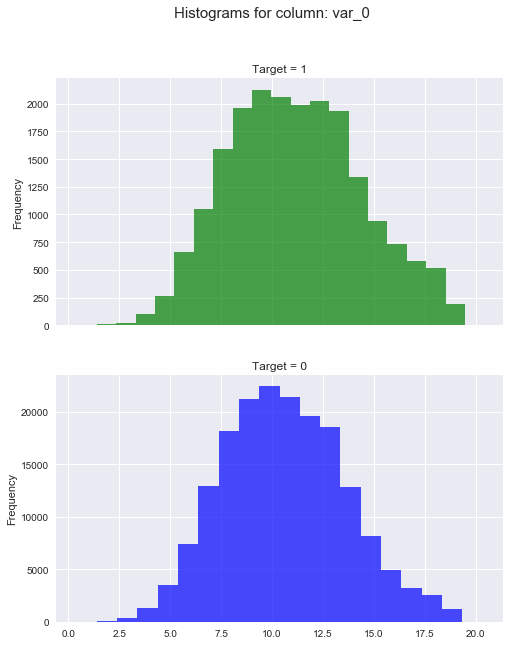

In [15]:
# displaying boxplots for the selected column:
fig1, axes1 = plt.subplots(ncols = 2, sharey = True, figsize=(10,5))

# boxplot only for records with target = 1
ax1 = df.loc[df["target"] == 1].boxplot(column = variables[index], ax=axes1[0], sym='k.')
ax1.set_title('Target = 1')

# boxplot only for records with target = 0
ax2 = df.loc[df["target"] == 0].boxplot(column = variables[index], ax=axes1[1], sym='k.')
ax2.set_title('Target = 0')

fig1.suptitle("Boxplots for column: " + str(variables[index]), fontsize=15)
plt.show()

#displaying histograms for the selected column:
fig2, axes2 = plt.subplots(nrows = 2, sharex = True, figsize=(8,10))

# boxplot only for records with target = 1
ax1 = df.loc[df["target"] == 1][variables[index]].plot.hist(ax=axes2[0], bins=20, color='green', alpha=0.7)
ax1.set_title('Target = 1')

# boxplot only for records with target = 0
ax2 = df.loc[df["target"] == 0][variables[index]].plot.hist(ax=axes2[1], bins=20, color='blue', alpha=0.7)
ax2.set_title('Target = 0')

fig2.suptitle("Histograms for column: " + str(variables[index]), fontsize=15)
plt.show()

In [13]:
# This will generate an Histogram for every variable... it'will take a bit to run.
'''
index = list(range(0,200))
for i in index:
    #displaying histograms for the selected column:
    fig2, axes2 = plt.subplots(nrows = 2, sharex = True, figsize=(4,5))

    # boxplot only for records with target = 1
    ax1 = df.loc[df["target"] == 1][variables[i]].plot.hist(ax=axes2[0], bins=20, color='green', alpha=0.7)
    ax1.set_title('Target = 1')

    # boxplot only for records with target = 0
    ax2 = df.loc[df["target"] == 0][variables[i]].plot.hist(ax=axes2[1], bins=20, color='blue', alpha=0.7)
    ax2.set_title('Target = 0')

    fig2.suptitle("Histograms for column: " + str(variables[i]), fontsize=15)
    plt.show()
'''

'\nindex = list(range(0,200))\nfor i in index:\n    #displaying histograms for the selected column:\n    fig2, axes2 = plt.subplots(nrows = 2, sharex = True, figsize=(4,5))\n\n    # boxplot only for records with target = 1\n    ax1 = df.loc[df["target"] == 1][variables[i]].plot.hist(ax=axes2[0], bins=20, color=\'green\', alpha=0.7)\n    ax1.set_title(\'Target = 1\')\n\n    # boxplot only for records with target = 0\n    ax2 = df.loc[df["target"] == 0][variables[i]].plot.hist(ax=axes2[1], bins=20, color=\'blue\', alpha=0.7)\n    ax2.set_title(\'Target = 0\')\n\n    fig2.suptitle("Histograms for column: " + str(variables[i]), fontsize=15)\n    plt.show()\n'

## Is the Dataset balanced?
## How many 0 and 1 items there are?

In [14]:
mylst = list(df["target"].value_counts())
zero = round(float((mylst[0]/sum(mylst))*100),2)
one = round(float((mylst[1]/sum(mylst))*100),2)
print('The dataset has {zero} % of target 0 and {one} % of target 1'.format(zero=zero, one=one))

The dataset has 89.95 % of target 0 and 10.05 % of target 1


#### Well, not very balanced... we'll keep that into account!

## Let's see if there are some correlations between our variables

In [15]:
# choose a threshold to spot correlation above its abs()
# try 0.08 or 0.05 to have some results, even though is not a relevant correlation 
threshold = 0.3
dfcorr = df.corr()
dfcorr1 = dfcorr.copy()
dfcorr1[abs(dfcorr1) < threshold] = None
dfcorr1[abs(dfcorr1) >= threshold] = 1

In [16]:
# all the variables have at least corr = 1 with itself so we want to know
# which variables have more than 1 record above the threshold
cor = dfcorr1.sum(axis=1) > 1

In [17]:
# Listing the variables that is worth investigating on
var_to_check = list(cor[cor.values == True].index)

In [18]:
if len(var_to_check) > 0:
    print('These are the variables with correlations >= {}:'.format(threshold))
    print(str(var_to_check) + '\n')
    for i in var_to_check:
        print(str(dfcorr[(abs(dfcorr[i]) >= threshold) & (abs(dfcorr[i]) != 1)][i]) + '\n')
else:
    print('There are no significant correlations to look!')

There are no significant correlations to look!


In [19]:
dfcorr[(dfcorr!=1) & (abs(dfcorr)>0.1)].count()

target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

All the correlations are < |0.1| ... They are extremely uncorrelated. Maybe too much.
Maybe they performed PCA on this data before

In [21]:
df[df.loc[:,'var_0':].duplicated()]

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
